In [7]:
from model import ParticleClassifier
import numpy as np

In [ ]:
classifier = ParticleClassifier()\
                .load_data('data/toy_data.csv')\
                .train_test_split()\
                .pre_proc_images(train=True, test=True)\
                .one_hot_encode_labels(train=True, test=True)\
                .train_model()\
                .evaluate_model()\

In [ ]:
# Hot pixel attack
classifier.hot_pixel_attack()\
          .pre_proc_images(attacked=True)\
          .one_hot_encode_labels(attacked=True)\
          .evaluate_attack()

In [8]:
# Background Neutrons (2x2) square of relatively high value
classifier = ParticleClassifier()\
                .load_data('data/toy_data.csv')\
                .train_test_split()\
                .pre_proc_images(train=True, test=True, filters=False)\
                .one_hot_encode_labels(train=True, test=True)\
                .train_model()\
                .evaluate_model()
value =  np.mean([classifier.images.max(), classifier.images.mean()])
classifier = classifier.apply_attack(classifier.add_hot_area, size=(2,2), value=value)\
                       .pre_proc_images(attacked=True, filters=False)\
                       .one_hot_encode_labels(attacked=True)\
                       .evaluate_attack()

Data loaded into self.images, self.labels
Split into self.images_train, self.images_test, self.labels_train, self.labels_test
Train and test labels encoded into self.y_train and self.y_test
Train on 1920 samples, validate on 480 samples
Epoch 1/10
1920/1920 [==============================] - 7s 3ms/sample - loss: 0.7038 - acc: 0.6594 - val_loss: 0.4882 - val_acc: 0.8396
Epoch 2/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.2922 - acc: 0.8828 - val_loss: 0.3514 - val_acc: 0.8500
Epoch 3/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.2394 - acc: 0.9094 - val_loss: 0.2405 - val_acc: 0.9062
Epoch 4/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.2195 - acc: 0.9172 - val_loss: 0.2584 - val_acc: 0.9042
Epoch 5/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.2032 - acc: 0.9271 - val_loss: 0.2034 - val_acc: 0.9271
Epoch 6/10
1920/1920 [==============================] - 5s 3ms/sample - loss: 0.172

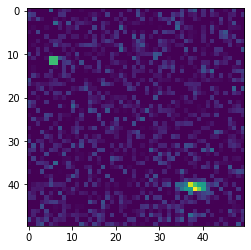

In [23]:
classifier.print_image(18, classifier.x_attacked)

In [27]:
classifier.model.predict(np.reshape(classifier.x_attacked[18], (1,50,50,1)))

array([[6.2665507e-08, 9.6418679e-01, 3.5813104e-02]], dtype=float32)

In [ ]:
images = classfier.images
value =  np.mean([classifier.images.max(), classifier.images.mean()])
classifier.apply_attack(classifier.add_hot_area, size=(2,2), value=value)

In [ ]:
np.mean([classifier.images.max(), classifier.images.mean()])